In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
# Load data
df = pd.read_csv("/content/health_sensor_dataset_4000.csv")

In [ ]:
df.head()

,Temperature,HeartRate,SpO2,Class
0,37.10,62,97,Normal
1,36.72,75,96,Normal
2,37.19,75,97,Normal
3,37.71,82,98,Abnormal
4,36.66,54,100,Abnormal


In [ ]:
# Encode class labels
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])  # Normal=1, Abnormal=0

In [ ]:
# Scale features
scaler = StandardScaler()
features = ['Temperature', 'HeartRate', 'SpO2']
df[features] = scaler.fit_transform(df[features])

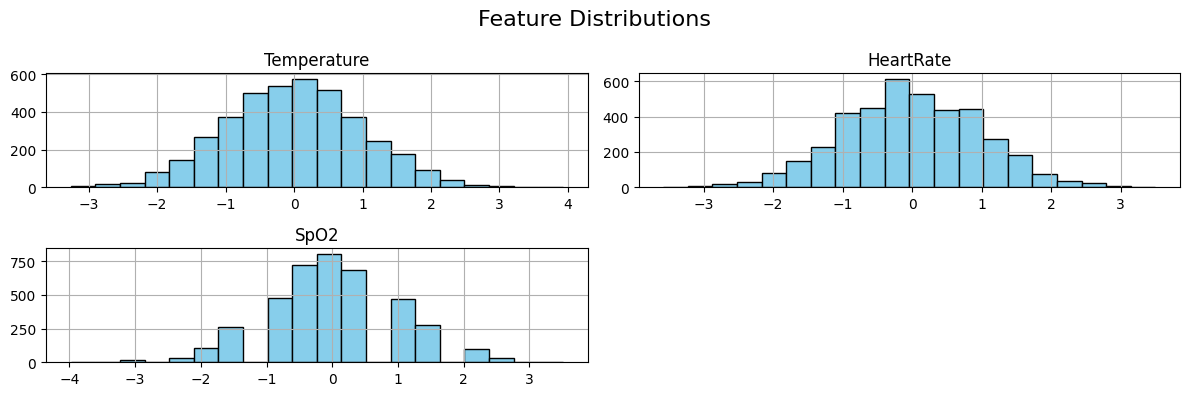

In [ ]:
# EDA - Feature distributions
df[features].hist(bins=20, figsize=(12, 4), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

<ipython-input-7-6925b232dd2b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


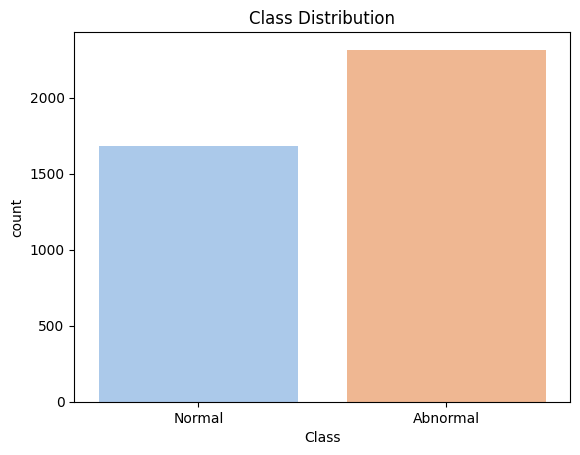

In [ ]:
# Class distribution
sns.countplot(x='Class', data=df, palette='pastel')
plt.title("Class Distribution")
plt.show()

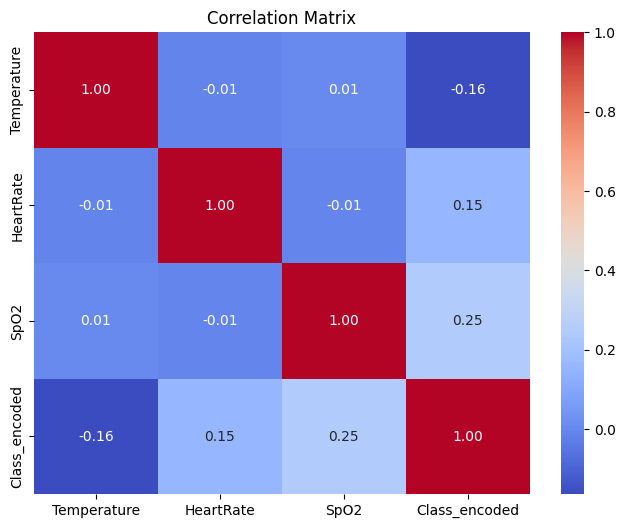

In [ ]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = df[features + ['Class_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Train/test split
X = df[features]
y = df['Class_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rf.predict(X_test)

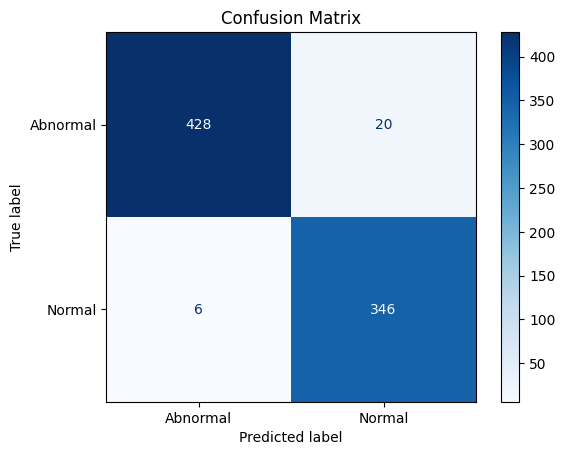

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

    Abnormal       0.99      0.96      0.97       448
      Normal       0.95      0.98      0.96       352

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [ ]:
import joblib

# حفظ النموذج
joblib.dump(rf, 'rf.pkl')

# تحميل النموذج لاحقًا
model = joblib.load('rf.pkl')

In [ ]:
# ===== User Input Section =====
import pandas as pd

print("\nEnter the following values to classify the condition:")
temp = float(input("Temperature (°C): "))
hr = int(input("Heart Rate (bpm): "))
spo2 = int(input("SpO2 (%): "))

# Preprocess the input
user_input = pd.DataFrame([[temp, hr, spo2]], columns=features)
user_input_scaled = scaler.transform(user_input)

# Predict
prediction = rf.predict(user_input_scaled)
result = le.inverse_transform(prediction)[0]

print(f"\n✅ Predicted condition: {result}")


Enter the following values to classify the condition:
Temperature (°C): 37
Heart Rate (bpm): 60
SpO2 (%): 97

✅ Predicted condition: Normal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA


In [ ]:
# Load dataset
df = pd.read_csv('/content/health_sensor_dataset_4000.csv')

In [ ]:
# ===== EDA =====
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  4000 non-null   float64
 1   HeartRate    4000 non-null   int64  
 2   SpO2         4000 non-null   int64  
 3   Class        4000 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 125.1+ KB
None

Summary Statistics:
       Temperature   HeartRate         SpO2
count  4000.000000  4000.00000  4000.000000
mean     36.811580    74.60200    96.973750
std       0.598271    15.25332     2.002889
min      34.860000    20.00000    89.000000
25%      36.410000    64.00000    96.000000
50%      36.810000    75.00000    97.000000
75%      37.200000    85.00000    98.000000
max      39.160000   128.00000   104.000000

Missing Values:
 Temperature    0
HeartRate      0
SpO2           0
Class          0
dtype: int64


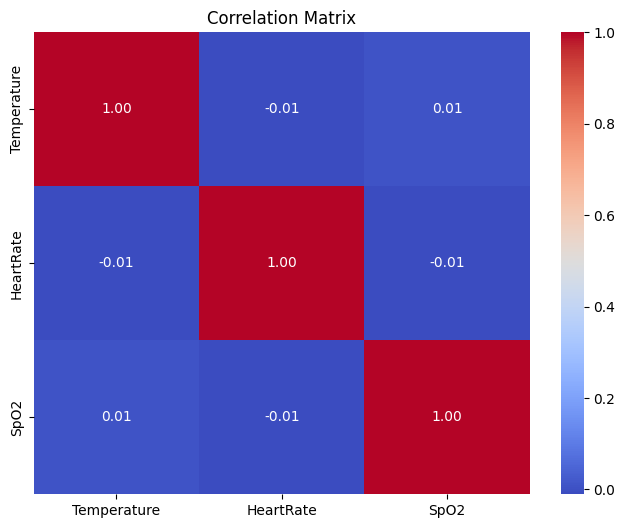

In [ ]:
# ===== Correlation Matrix =====
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Class']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# ===== Encode Target Column =====
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])

# ===== Features and Target =====
X = df[['Temperature', 'HeartRate', 'SpO2']]
y = df['Class_encoded']

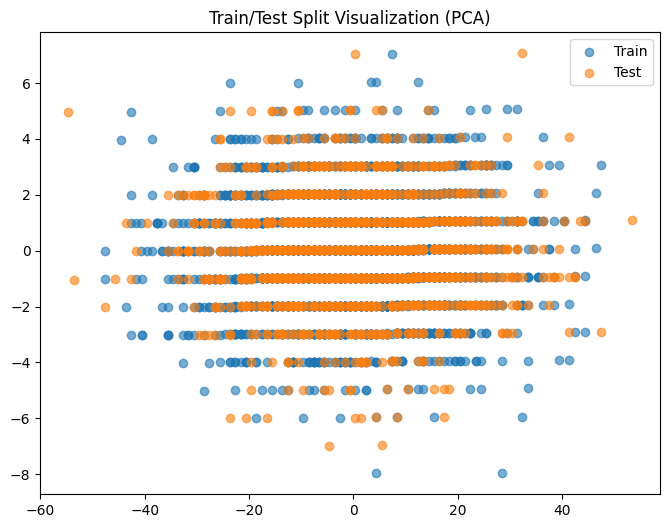

In [ ]:
# ===== Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===== Visualize Train/Test Split using PCA =====
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:len(X_train), 0], X_pca[:len(X_train), 1], label='Train', alpha=0.6)
plt.scatter(X_pca[len(X_train):, 0], X_pca[len(X_train):, 1], label='Test', alpha=0.6)
plt.title("Train/Test Split Visualization (PCA)")
plt.legend()
plt.show()


In [ ]:
# ===== Train Classifier =====
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


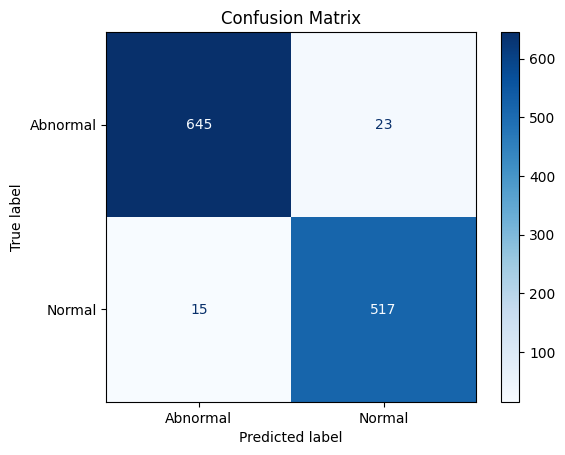

In [ ]:
# ===== Confusion Matrix =====
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# ===== Classification Report & Accuracy =====
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")



Classification Report:

              precision    recall  f1-score   support

    Abnormal       0.98      0.97      0.97       668
      Normal       0.96      0.97      0.96       532

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Accuracy Score: 0.9683


In [ ]:
import joblib

# حفظ النموذج
joblib.dump(clf , 'lof.pkl')

# تحميل النموذج لاحقًا
model = joblib.load('lof.pkl')


In [ ]:
# ===== Local Outlier Factor (LOF) =====
lof = LocalOutlierFactor(n_neighbors=20)
y_lof = lof.fit_predict(X)
outliers = y_lof == -1

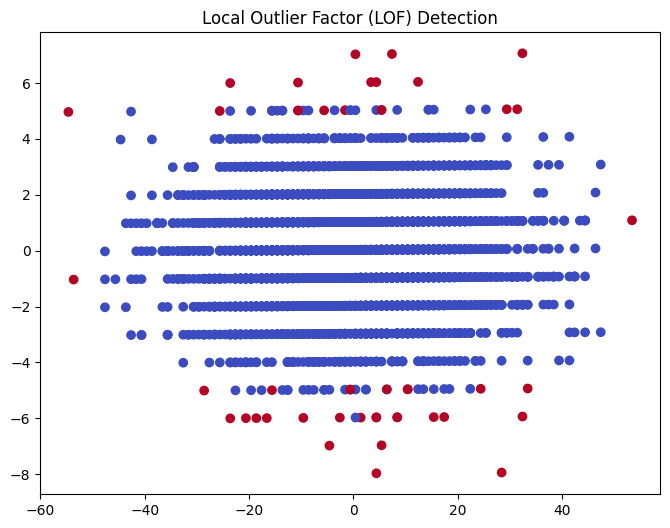

In [ ]:
# ===== Plot LOF Results (PCA) =====
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers, cmap='coolwarm', label='LOF Outliers')
plt.title("Local Outlier Factor (LOF) Detection")
plt.show()

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
# ===== One-Class SVM =====
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
y_ocsvm = oc_svm.fit_predict(X)
svm_outliers = y_ocsvm == -1


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Map true labels: "Normal" → -1 (inlier), "Abnormal" → 1 (outlier)
true_outlier_labels = df['Class'].apply(lambda x: -1 if x == 'Normal' else 1)

# Print classification report and accuracy
print("\nClassification Report for One-Class SVM:\n")
print(classification_report(true_outlier_labels, y_ocsvm, target_names=["Normal", "Abnormal"]))
print(f"One-Class SVM Accuracy: {accuracy_score(true_outlier_labels, y_ocsvm):.4f}")



Classification Report for One-Class SVM:

              precision    recall  f1-score   support

      Normal       0.10      0.02      0.03      1685
    Abnormal       0.55      0.89      0.68      2315

    accuracy                           0.52      4000
   macro avg       0.33      0.45      0.36      4000
weighted avg       0.36      0.52      0.41      4000

One-Class SVM Accuracy: 0.5208


In [ ]:
import joblib

# حفظ النموذج
joblib.dump(oc_svm, 'One-Class SVM.pkl')

# تحميل النموذج لاحقًا
model = joblib.load('One-Class SVM.pkl')


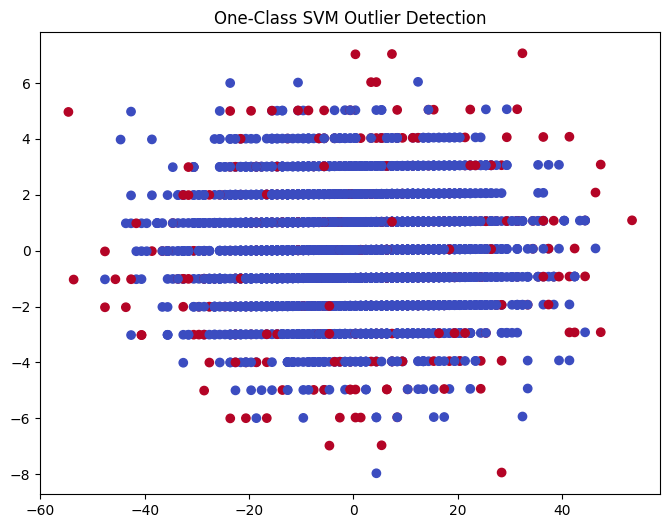

In [ ]:
# ===== Plot One-Class SVM Results (PCA) =====
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=svm_outliers, cmap='coolwarm', label='SVM Outliers')
plt.title("One-Class SVM Outlier Detection")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
# Load dataset
df = pd.read_csv('/content/health_sensor_dataset_4000.csv')


In [ ]:
# ===== Encode and Preprocess =====
le = LabelEncoder()
df['Class_encoded'] = le.fit_transform(df['Class'])  # Normal = 1, Abnormal = 0 or vice versa

X = df[['Temperature', 'HeartRate', 'SpO2']]
y = df['Class_encoded']

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# ===== Build ANN Model =====
model = Sequential([
    Dense(128, input_shape=(3,), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.2, verbose=0)

In [ ]:
# ===== Evaluate Model =====
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# ===== Metrics =====
print("\nClassification Report (ANN):\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Classification Report (ANN):

              precision    recall  f1-score   support

    Abnormal       0.97      0.96      0.97       668
      Normal       0.95      0.97      0.96       532

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200

Accuracy: 0.9642


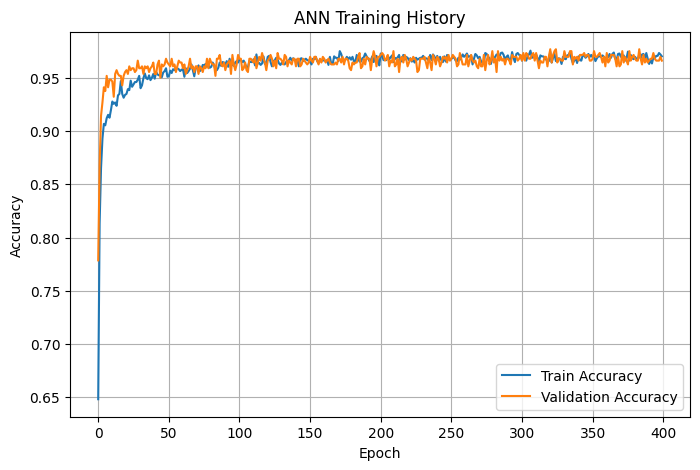

In [ ]:
# ===== Plot Training History =====
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Training History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# حفظ النموذج بصيغة HDF5
model.save('ANN.h5')

# تحميل النموذج
from tensorflow.keras.models import load_model
model = load_model('ANN.h5')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load dataset
df = pd.read_csv("/content/health_sensor_dataset_4000.csv")


In [ ]:
# 2. Encode labels
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])


In [ ]:
# 3. Feature engineering
df['Temp_HR'] = df['Temperature'] * df['HeartRate']
df['HR/SpO2'] = df['HeartRate'] / df['SpO2']


In [ ]:
# 4. Select features
X = df[['Temperature', 'HeartRate', 'SpO2', 'Temp_HR', 'HR/SpO2']].values
y = df['Class'].values


In [ ]:
# 5. Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 6. Remove outliers
z = np.abs(stats.zscore(X_scaled))
mask = (z < 3).all(axis=1)
X_scaled = X_scaled[mask]
y = y[mask]


In [ ]:
# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# 8. Grid search parameters
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 2]
}


In [ ]:
# 9. Compute class weight if needed
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

# 10. XGBoost base model
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)


In [ ]:
# 11. GridSearchCV
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [ ]:
# 12. Train
grid.fit(X_train, y_train)

# 13. Best model
best_model = grid.best_estimator_
print("\n🔍 Best Parameters Found:")
print(grid.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits

🔍 Best Parameters Found:
{'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0, 'reg_lambda': 2, 'subsample': 1.0}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:52:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# 14. Predict
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy after GridSearch: {acc * 100:.2f}%")


✅ Accuracy after GridSearch: 96.46%


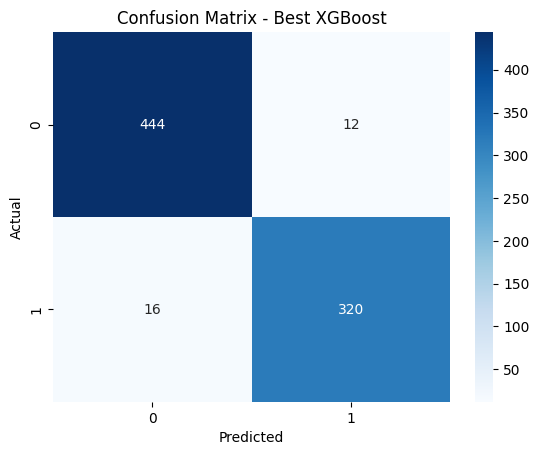

In [ ]:
# 15. Evaluation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best XGBoost")
plt.show()


In [ ]:
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


📋 Classification Report:
              precision    recall  f1-score   support

    Abnormal       0.97      0.97      0.97       456
      Normal       0.96      0.95      0.96       336

    accuracy                           0.96       792
   macro avg       0.96      0.96      0.96       792
weighted avg       0.96      0.96      0.96       792



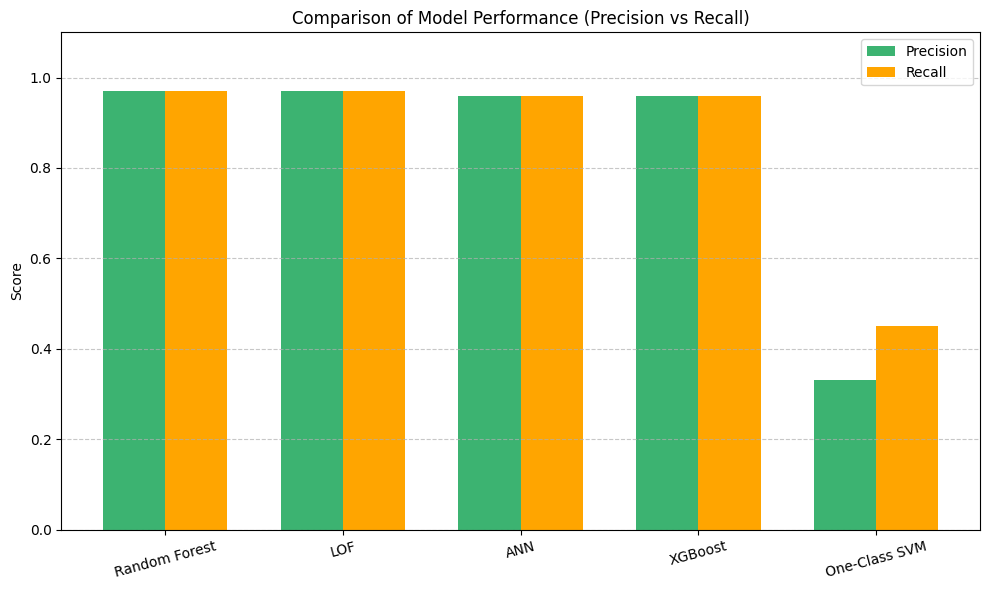

In [ ]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'LOF', 'ANN', 'XGBoost', 'One-Class SVM']

# Precision و Recall
precisions = [0.97, 0.97, 0.96, 0.96, 0.33]
recalls = [0.97, 0.97, 0.96, 0.96, 0.45]


x = range(len(models))
width = 0.35


plt.figure(figsize=(10, 6))
plt.bar([i - width/2 for i in x], precisions, width=width, label='Precision', color='mediumseagreen')
plt.bar([i + width/2 for i in x], recalls, width=width, label='Recall', color='orange')

plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.title("Comparison of Model Performance (Precision vs Recall)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


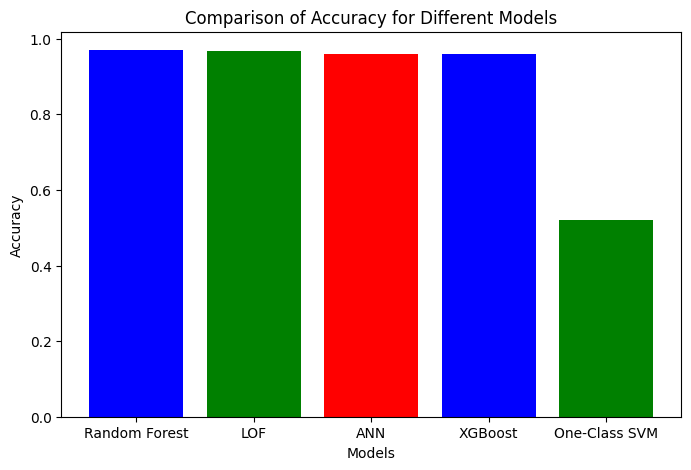

In [ ]:
import matplotlib.pyplot as plt


models = ['Random Forest', 'LOF', 'ANN', 'XGBoost', 'One-Class SVM']
accuracy = [0.97, 0.9683, 0.9608, 0.96, 0.52]


plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['blue', 'green', 'red'])


plt.title('Comparison of Accuracy for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')


plt.show()
